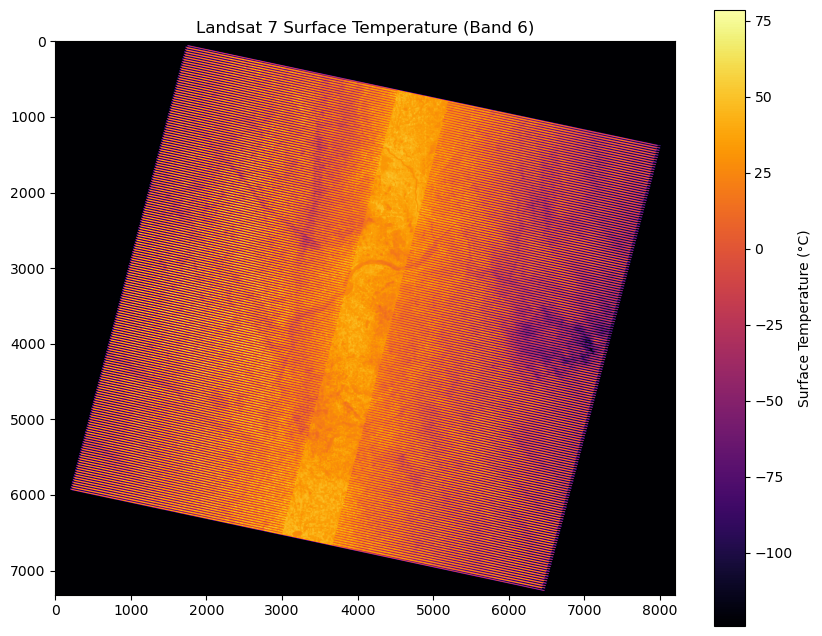

In [3]:
import rasterio
import numpy as np
import matplotlib.pyplot as plt

tif_path = "LE07_L2SP_027029_20110701_20200909_02_T1_ST_B6.TIF"
mtl_path = "LE07_L2SP_027029_20110701_20200909_02_T1_MTL.txt"

#scale = 0.00341802
#offset = 149.0

with open(mtl_path, "r") as f:
    mtl = f.read()
    scale  = float(mtl.split("TEMPERATURE_MULT_BAND_ST_B6 = ")[1].split()[0])
    offset = float(mtl.split("TEMPERATURE_ADD_BAND_ST_B6 = ")[1].split()[0])

with rasterio.open(tif_path) as src:
    DN = src.read(1).astype("float32")
    #DN[DN <= 1] = np.nan
    
# Convert from DN to Kelvin to Celsius
tempCelsius = (scale * DN + offset) - 273.15   

# plotting images
plt.figure(figsize=(10, 8))
plt.imshow(tempCelsius, cmap='inferno')
plt.colorbar(label="Surface Temperature (°C)")
plt.title("Landsat 7 Surface Temperature (Band 6)")
plt.show()

Min Temp (°C): -123.14851
Max Temp (°C): 78.52835
Mean Temp (°C): 30.237434


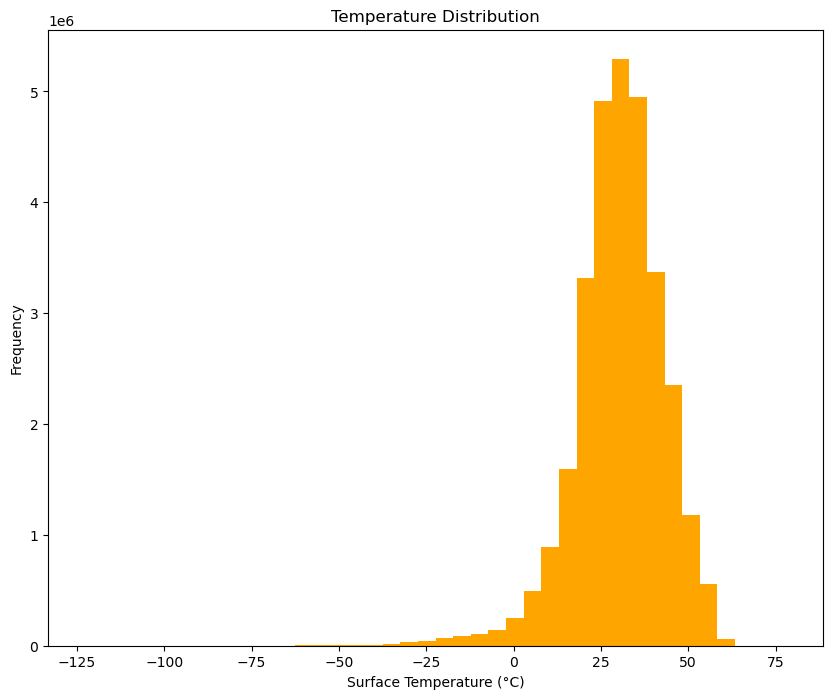

In [2]:
import rasterio
import numpy as np
import matplotlib.pyplot as plt

print("Min Temp (°C):", np.nanmin(tempCelsius))
print("Max Temp (°C):", np.nanmax(tempCelsius))
print("Mean Temp (°C):", np.nanmean(tempCelsius))

plt.figure(figsize=(10,8))
plt.hist(tempCelsius.flatten(), bins=40, color='orange')
plt.xlabel("Surface Temperature (°C)")
plt.ylabel("Frequency")
plt.title("Temperature Distribution")
plt.show()